In [68]:
import pandas as pd
import matplotlib.pyplot as plt

In [86]:
df = pd.read_csv(path, sep=";",skiprows=range(0, 10005),nrows=4000)
df['mid_price'] = (df['bid_price_1']+df['ask_price_1'])/2
print(df.columns.values.tolist())

# create dataframes for separate instruments and calculate rolling averages
df_am = df.loc[df["product"] == "AMETHYSTS"]
df_am['it'] = df_am['timestamp']/100
df_am['20it_rolling'] = df_am['mid_price'].rolling(20).mean()

df_star = df.loc[df["product"] == "STARFRUIT"]
df_star['it'] = df_star['timestamp']/100
df_star['20it_rolling'] = df_star['mid_price'].rolling(20).mean()


['day', 'timestamp', 'product', 'bid_price_1', 'bid_volume_1', 'bid_price_2', 'bid_volume_2', 'bid_price_3', 'bid_volume_3', 'ask_price_1', 'ask_volume_1', 'ask_price_2', 'ask_volume_2', 'ask_price_3', 'ask_volume_3', 'mid_price', 'profit_and_loss']


C:\Users\reves\AppData\Local\Temp\ipykernel_19148\3206668395.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_am['it'] = df_am['timestamp']/100
C:\Users\reves\AppData\Local\Temp\ipykernel_19148\3206668395.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_am['20it_rolling'] = df_am['mid_price'].rolling(20).mean()
C:\Users\reves\AppData\Local\Temp\ipykernel_19148\3206668395.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

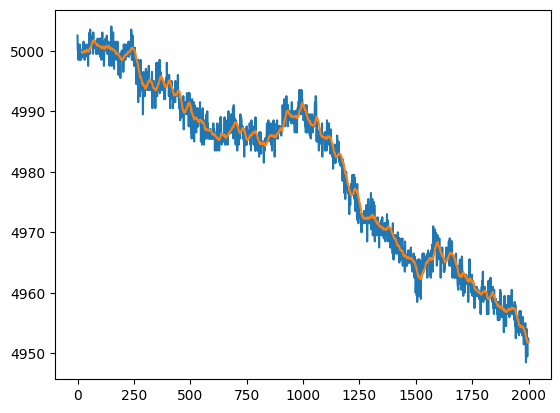

In [87]:
plt.plot(df_star['it'],df_star['mid_price'])
plt.plot(df_star['it'],df_star['20it_rolling'])

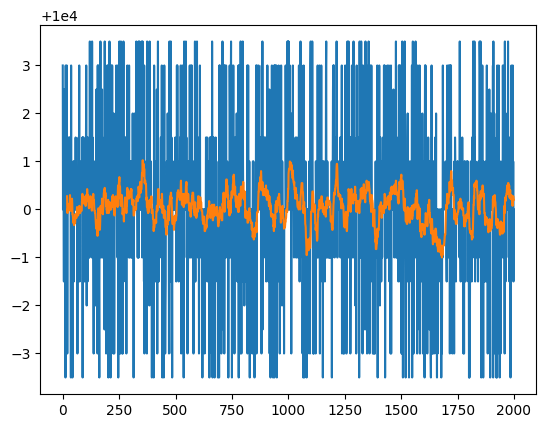

In [90]:
plt.plot(df_am['it'], df_am['mid_price'])
plt.plot(df_am['it'],df_am["20it_rolling"])

(array([  56.,    0.,    0.,   97.,    0.,    0.,    0.,   10.,    0.,
           0.,   15.,    0.,    0.,    0.,   94.,    0.,    0.,  172.,
           0.,    0.,    0.,    0.,    0.,    0.,    0., 1059.,    0.,
           0.,    0.,    0.,    0.,    0.,  190.,    0.,    0.,  102.,
           0.,    0.,    0.,   19.,    0.,    0.,   10.,    0.,    0.,
           0.,  119.,    0.,    0.,   57.]),
 array([ 9996.5 ,  9996.64,  9996.78,  9996.92,  9997.06,  9997.2 ,
         9997.34,  9997.48,  9997.62,  9997.76,  9997.9 ,  9998.04,
         9998.18,  9998.32,  9998.46,  9998.6 ,  9998.74,  9998.88,
         9999.02,  9999.16,  9999.3 ,  9999.44,  9999.58,  9999.72,
         9999.86, 10000.  , 10000.14, 10000.28, 10000.42, 10000.56,
        10000.7 , 10000.84, 10000.98, 10001.12, 10001.26, 10001.4 ,
        10001.54, 10001.68, 10001.82, 10001.96, 10002.1 , 10002.24,
        10002.38, 10002.52, 10002.66, 10002.8 , 10002.94, 10003.08,
        10003.22, 10003.36, 10003.5 ]),
 <BarContainer o

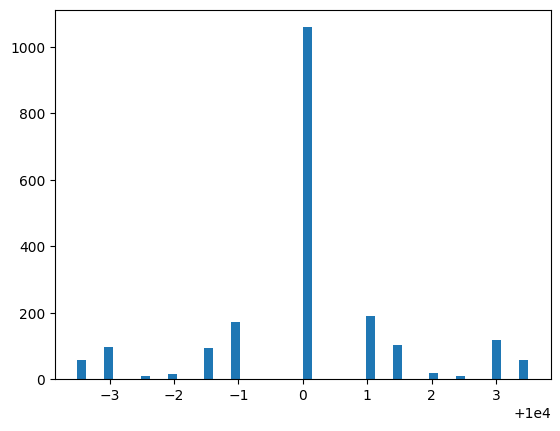

In [94]:
plt.hist(df_am['mid_price'],bins=50)
